# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
minimum_price = np.min(prices)
maximum_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **

- We expect for there to be a positive relationship between `'RM'` and `'MEDV`' -- that is to say, we expect larger values of `'RM'` to be correlated with larger values of `'MEDV'`. The intuition behind this should be obvious, since (all other things being equal), larger houses tend to be more expensive.
- Similarly, we expect for there to be a negative relationship between `'LSTAT'` and `'MEDV'`. The greater the proportion of lower-class households in the neighborhood, the lower the median household income, and there is almost certainly a strong relationship between household income and housing prices.
- Finally, we expect for there to be a negative relationship between `'PTRATIO'` and `'MEDV'`. Student-teacher ratio is a proxy for school quality, with higher values implying lower school quality. We would expect to see a strong relationship between home value and school quality.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [3]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**

The model above appears to have successfully captured the variation in the response. The $R^2$ value of 0.923 can be interpreted as saying that the model explains 92.3% of the variance in the response.

Of course, the interpretation of $R^2$ is highly dependent on the modeling context. If there is a known deterministic relationship between the predictors and response and all variables are observed with little or no measurement error, or if these five data points were used for both training and testing and the fitted model has 4 degrees of freedom, then an $R^2$ value of 0.923 could mean a poor model fit. However, for most typical machine learning applications, this $R^2$ value (on test data) would indicate a successful model.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, prices, test_size=0.2, random_state=1729
)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **

The reason splitting data into training and testing sets is so important is that the fundamental challenge of machine learning is building models that *generalize* well. The bias-variance tradeoff implies that after a certain point, improving in-sample performance will actually hurt out-of-sample performance. For that reason, it's important to reserve some data for testing purposes, so we can obtain an unbiased estimate of the model's predictive performance on out-of-sample data.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

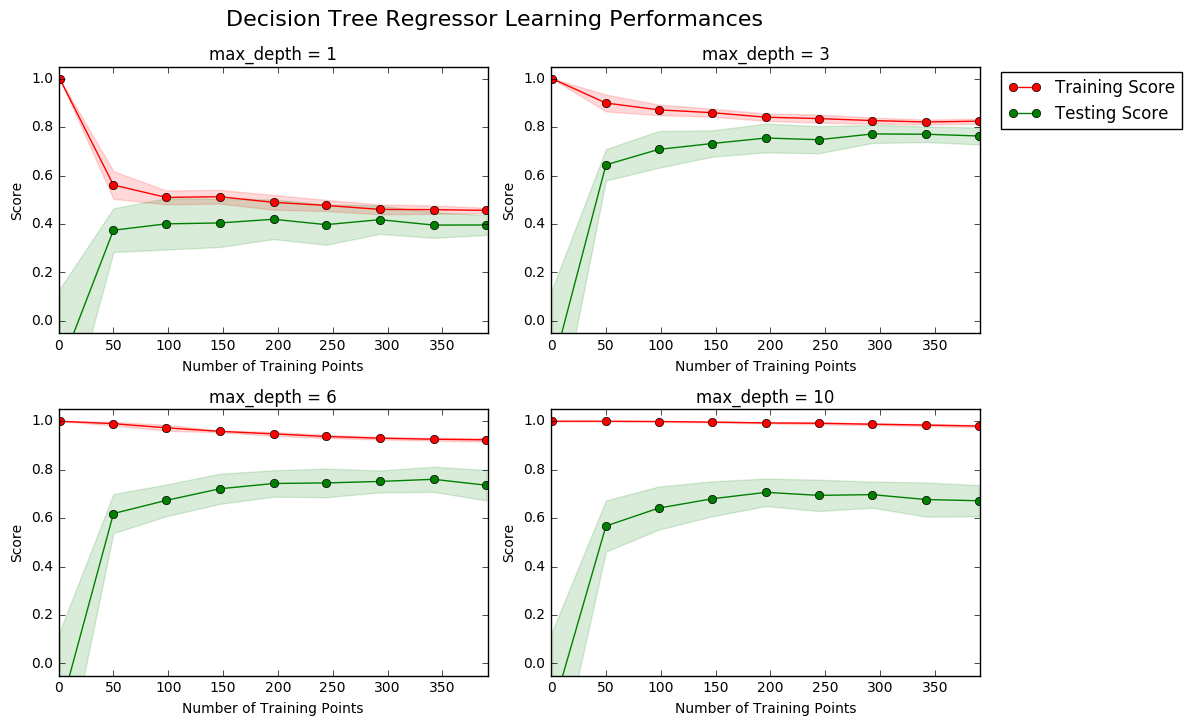

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **

For the graph where `max_depth = 3`, adding more points to the training data actually hurts the in-sample performance of the model (the training score curve slopes downward). This is an artifact of the way we're defining complexity for this class of models. A decision tree with a maximum depth of 3 will have $2^3 = 8$ terminal nodes, so for $n$ training points, each terminal node will have an average of $n / 8$ points. As $n$ increases, each terminal node will have to accomodate more points, and thus the in-sample performance will deteriorate (for roughly the same reasons that sample variance underestimates population variance).

By contrast, the out-of-sample performance of the model improves as the number of training points increases. This is entirely as expected, since as we get more data, we will be able to more accurately estimate the parameters of the true model. (Or rather, since the true data-generating process is almost certainly *not* a tree, we can asymptotically approach the model in our hypothesis space that is the best approximation to the true relationship.)

As the number of training points increases the out-of-sample performance is still increasing, but it is clearly a case of diminishing returns. Each additional set of 50 points improves the out-of-sample performance less than the previous set, and the performance appears to be asymptotically approaching some theoretical maximum $R^2$ (that is less than 1.0). Obviously, if more data is freely available, it should be used during model fitting to improve performance. However, if obtaining more data (beyond the ~390 training points at our disposal) requires expending significantly more resources, the additional performance probably isn't worth the marginal cost.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

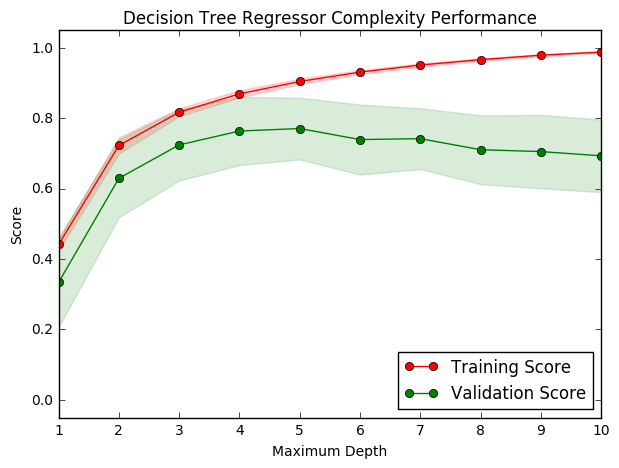

In [7]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **

When the model is trained with `max_depth = 1`, the model exhibits high bias. This is clear because both train and validation performance are poor, implying that the model has barely taken the data into account.

By contrast, when the model is trained with `max_depth = 10`, it exhibits high variance. This is clearly the case because the train performance is very high, but validation performance is significantly lower (and deteriorating). This means that the model has learned the training data almost perfectly, but is having a great deal of difficulty generalizing to out-of-sample data.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **

Based on the graph above, the value of `max_depth` that leads to the best out-of-sample performance is approximately 5. There was no "intuition" involved in reaching this conclusion -- it was simply a matter of reading the global maximum of the validation performance off the graph above.

The reason I used the weasel-word "approximately" in the above paragraph is that the validation performance plotted above is itself an estimate of the true generalization performance of the model. Given much more out-of-sample data, it may turn out the true maximum on the complexity curve is in a slightly different place.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **

Grid search is a very simple optimization technique. Given a $k$-dimensional space in which we want to find an approximate optimum, we choose $n_i$ candidate values for each of the dimensions $i, i \in \{1, 2, \ldots k\}$. We then evaluate the function we wish to optimize at each of the $n_1 \cdot n_2 \cdot \ldots \cdot n_k$ locations in the grid formed by all combinations of the inputs, then choose the set of inputs that yields the maximum value.

The application of grid search to learning algorithm metaparameter optimization is pretty straightforward. For each metaparameter we wish to tune, we choose some set of candidate values, estimate the model's out-of-sample performance at every possible combination of candidate metaparameter values, then choose the combination with the best estimated performance.

Grid search is very slow (its runtime is exponential in $k$), and most optimization problems use much more sophisticated techniques. However, grid search is a good fit for this application, because our estimates of model performance are noisy, so we can't estimate derivatives to decide in which direction to head in the input space.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **

$k$-fold cross-validation is a technique for estimating the out-of-sample performance of a model without designating any data as a test set. The data is split into $k$ equal-sized folds, then each of the folds is held out in turn while the model is fit to the remaining $k - 1$ folds, and the model's performance on the holdout fold is computed. The model's estimated generalization performance is then estimated by averaging the performance over the holdout folds. In this way, every point in the data gets to act as both training and testing data at some point.

The reason to use cross-validation during grid search is that it gives a much better estimate of out-of-sample performance than simply relying on training performance would. Moreover, the location of the in-sample performance maximum within the metaparameter space is almost certainly at a different location than the out-of-sample performance maximum -- the in-sample performance maximum will be with metaparameters that lead to higher-variance models.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_iter'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    
    regressor = DecisionTreeRegressor()
    params = {'max_depth': range(1, 11)} 
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [9]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 5 for the optimal model.


**Answer: **

The grid search yields an estimated optimal value of 5 for `max_depth`. This is the same as the *estimate* (*not* a guess) I provided in Question 6. Given that the two estimates relied on similar strategies for estimating out-of-sample performance, it is unsurprising (and reassuring) that they agreed on the optimum value of the tuning parameter.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [10]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $275,100.00
Predicted selling price for Client 2's home: $182,205.88
Predicted selling price for Client 3's home: $886,620.00


**Answer: **

The recommended selling prices for each home are shown in the output of the above code block. These results seem intuitively reasonable. As discussed in Question 1, there are strong reasons to think that the data has monotonic relationships between each of the input features and the response variable. Furthermore, each of the features of Client 1's home seem strictly preferable to Client 2's home (more rooms, higher socioeconomic class, and fewer students per teacher). Likewise, each feature of Client 3's home seems strictly preferable to Client 1's home. Thus, without even building a model or having to guess at the relative magnitudes of these effects, we would assume that Client 3's home would be most expensive, and Client 2's home would be least expensive. As it turns out, our model's predictions agree perfectly with this heuristic argument.

All of the predicted selling prices seem reasonable on their face, given the summary statistics we calculated earlier; the range of the predictions contains the mean, and all of the predictions are between the minimum and maxmimum median values in the data set. (Of course, we would expect this to by true by construction for any decision tree model -- if it weren't true, we would know something had gone seriously wrong!)

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [11]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

The question of whether the model we constructed should be used in a real-world setting is entirely contingent on what real-world application is intended. However, for most conceivable applications, the answer is a resounding no.

The data collected was from Boston in 1978, and the real-estate market is sufficiently dynamic that applying this model to Boston today, let alone another geographic area today, is highly suspect. Furthermore, the model we constructed is an extremely simplistic decision tree built on only three features. There are dozens (if not hundreds) of relevant features that may affect the price of a home, almost all of which we ignored. For those features that we do include, we assumed a very simple relationship with the response variable that includes large discontinuities -- discontinuities that we would not expect to be in the true underlying relationship.

Furthermore, single decision trees are extremely variable, so small changes to the input data ca nyield extremely large changes to model structure and model predictions. For example, the 10 resampled re-fits of the model above yielded esimates of a single home's cost that varied by more then 15%! A more robust model fit to more data would have lower prediction variance.

Finally, we must remember that the data we're analyzing is on *median* home values for *neighborhoods*. The hypothetical application of this model in Question 10 is completely ludicrous -- we were using a model trained on neighborhood-level data to estimate home-level effects. There are very good reasons to think that the effect of adding another room to every home in a neighborhood on the median home value would be different than the effect of adding another room to one particular home on its value.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.